In [1]:
import palantir
import scanpy as sc
import numpy as np
import pandas as pd
import os

# Plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Inline plotting
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['image.cmap'] = 'Spectral_r'
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

# Reset random seed
np.random.seed(5)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


In [31]:
adata = sc.read_h5ad("../tmp/04.1OSCCallFIB_donor1.scaled.h5ad")

In [32]:
adata

AnnData object with n_obs × n_vars = 4576 × 1000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'donor', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'highlight', 'celltype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_harmony', 'X_harmony_umap', 'X_pca', 'X_tsne', 'X_umap'

In [33]:
adata.to_df().head()

ISG15  TNFRSF18   TNFRSF4   MMP23B    ERRFI1  \
OSCC1_AAAGATGGTGCTAGCC -0.163327 -0.232517 -0.209183 -0.46918 -0.505724   
OSCC1_ACACCAAGTAGGGTAC  0.916189 -0.232517 -0.209183 -0.46918 -0.505724   
OSCC1_ACCAGTAGTACATGTC -1.235092 -0.232517 -0.209183 -0.46918 -0.505724   
OSCC1_ACCGTAAAGCACCGCT  0.247866 -0.232517 -0.209183 -0.46918 -0.505724   
OSCC1_ACGAGGACAGCTGTGC -1.235092 -0.232517 -0.209183 -0.46918 -0.505724   

                            ENO1  AL021155.5  TNFRSF1B      PDPN     HSPB7  \
OSCC1_AAAGATGGTGCTAGCC  0.015838   -0.229776 -0.252617 -0.830691  5.418672   
OSCC1_ACACCAAGTAGGGTAC -1.503612   -0.229776 -0.252617 -0.830691 -0.192139   
OSCC1_ACCAGTAGTACATGTC -1.503612   -0.229776 -0.252617 -0.830691 -0.192139   
OSCC1_ACCGTAAAGCACCGCT  1.064182   -0.229776 -0.252617 -0.830691 -0.192139   
OSCC1_ACGAGGACAGCTGTGC  0.882013   -0.229776 -0.252617 -0.830691 -0.192139   

                        ...     TIMP1    PCSK1N     IL2RG     ITM2A     ACSL4  \
OSCC1_AAAGATGGTGCTAGCC  ...  0.639330 -0.145921 -0.220969 -0.281814 -0.443322   
OSCC1_ACACCAAGTAGGGTAC  ... -0.689985 -0.145921 -0.220969 -0.281814 -0.443322   
OSCC1_ACCAGTAGTACATGTC  ... -0.664272 -0.145921 -0.220969 -0.281814 -0.443322   
OSCC1_ACCGTAAAGCACCGCT  ...  1.877550 -0.145921 -0.220969 -0.281814 -0.443322   
OSCC1_ACGAGGACAGCTGTGC  ... -0.200644 -0.145921 -0.220969 -0.281814 -0.443322   

                            GPC3  MIR503HG     HMGB3       BGN    MT-CO2  
OSCC1_AAAGATGGTGCTAGCC -0.268081 -0.239695  3.498069  0.802935 -1.557018  
OSCC1_ACACCAAGTAGGGTAC -0.268081 -0.239695 -0.379911  0.376773  0.245682  
OSCC1_ACCAGTAGTACATGTC -0.268081 -0.239695 -0.379911  0.078017 -0.115451  
OSCC1_ACCGTAAAGCACCGCT -0.268081 -0.239695 -0.379911  0.639138  0.837877  
OSCC1_ACGAGGACAGCTGTGC -0.268081 -0.239695 -0.379911 -1.841523 -0.009901  

[5 rows x 1000 columns]

In [34]:
adata = adata[adata.obs.celltype != "Mast cell"]
adata

View of AnnData object with n_obs × n_vars = 4576 × 1000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'donor', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'highlight', 'celltype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_harmony', 'X_harmony_umap', 'X_pca', 'X_tsne', 'X_umap'

In [35]:
adata.obs.celltype.value_counts()

F00            1086
F01             921
F02             748
F03             742
F04             288
OSCC_Normal     249
F06             235
F07             127
F08              74
F09              71
F10              35
Name: celltype, dtype: int64

In [36]:
sc.tl.pca(adata, n_comps=300)

In [37]:
pca_projections = pd.DataFrame(adata.obsm['X_pca'], index=adata.obs_names)

In [38]:
pca_projections.head()

0         1         2         3         4    \
OSCC1_AAAGATGGTGCTAGCC  13.572216 -1.878375  6.675048  1.057617 -1.287815   
OSCC1_ACACCAAGTAGGGTAC   9.680254 -0.661901  1.546580  2.316592 -0.933074   
OSCC1_ACCAGTAGTACATGTC  10.870399  0.242448  4.993251 -3.938586 -2.200436   
OSCC1_ACCGTAAAGCACCGCT  -2.741020 -2.958237  2.103548  0.917720 -2.834120   
OSCC1_ACGAGGACAGCTGTGC   6.526637  2.096947 -4.861699  2.443543  0.160671   

                             5         6         7         8         9    ...  \
OSCC1_AAAGATGGTGCTAGCC -5.151496 -0.887373 -2.469390 -3.993488 -0.187066  ...   
OSCC1_ACACCAAGTAGGGTAC -1.310408  0.697399  0.585887 -1.149268 -2.383842  ...   
OSCC1_ACCAGTAGTACATGTC  0.773284 -0.277754 -0.994699  4.782309 -0.031074  ...   
OSCC1_ACCGTAAAGCACCGCT  2.023546 -5.006749  1.522984 -0.028495 -1.666131  ...   
OSCC1_ACGAGGACAGCTGTGC -2.475130  2.550080  0.947814  3.193907  0.615716  ...   

                             290       291       292       293       294  \
OSCC1_AAAGATGGTGCTAGCC -0.429030 -0.238786  0.328400 -0.159478  0.551633   
OSCC1_ACACCAAGTAGGGTAC -0.005268 -1.283676 -0.697635 -0.360485 -0.015955   
OSCC1_ACCAGTAGTACATGTC  1.313807  0.658040  1.432459  0.637538 -0.218596   
OSCC1_ACCGTAAAGCACCGCT  0.767791  0.182053  1.543657  0.049084  0.298055   
OSCC1_ACGAGGACAGCTGTGC -0.264627 -0.612260 -0.852039  1.386733 -2.117954   

                             295       296       297       298       299  
OSCC1_AAAGATGGTGCTAGCC  1.821738  3.238086 -1.119602  0.498046 -0.511132  
OSCC1_ACACCAAGTAGGGTAC  0.657980  0.469501  1.587285  1.145061  0.073309  
OSCC1_ACCAGTAGTACATGTC -0.842871  1.118846  0.286443  0.808877 -0.523457  
OSCC1_ACCGTAAAGCACCGCT -0.431772  1.370548  1.465104  0.012844  0.827791  
OSCC1_ACGAGGACAGCTGTGC  0.078964 -0.690364  1.085125  0.197229 -1.055980  

[5 rows x 300 columns]

In [39]:
## (1)Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=10)

Determing nearest neighbor graph...


In [40]:
dm_res['EigenVectors'].shape

(4576, 10)

In [41]:
dm_res.keys()

dict_keys(['T', 'EigenVectors', 'EigenValues', 'kernel'])

In [42]:
# 选择多少维DCs
#ms_data = palantir.utils.determine_multiscale_space(dm_res)
 #如果不选择：run me
ms_data = dm_res['EigenVectors']

In [43]:
ms_data.shape

(4576, 10)

In [44]:
early_cell = 'OSCC15_AGTCATGGTTATAGCC'
pr_res = palantir.core.run_palantir(ms_data, early_cell=early_cell, use_early_cell_as_start=True, num_waypoints=500, knn=30)

Sampling and flocking waypoints...
Time for determining waypoints: 0.001990667978922526 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.047370541095733645 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9984
Correlation at iteration 2: 0.9998
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/home/data/gz0323/.local/lib/python3.8/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]
/home/data/gz0323/.local/lib/python3.8/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]
/home/data/gz0323/.local/lib/python3.8/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]
/home/data/gz0323/.local/lib/python3.8/site-packages/palantir/core.py:447: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

In [45]:
adata.obs['pseudotime'] = pr_res.pseudotime
adata.obs["DP"] = pr_res.entropy

In [46]:
adata.obsm

AxisArrays with keys: X_diffusion.map, X_dm.tsne, X_dm.umap, X_fr, X_harmony, X_harmony_umap, X_pca, X_tsne, X_umap

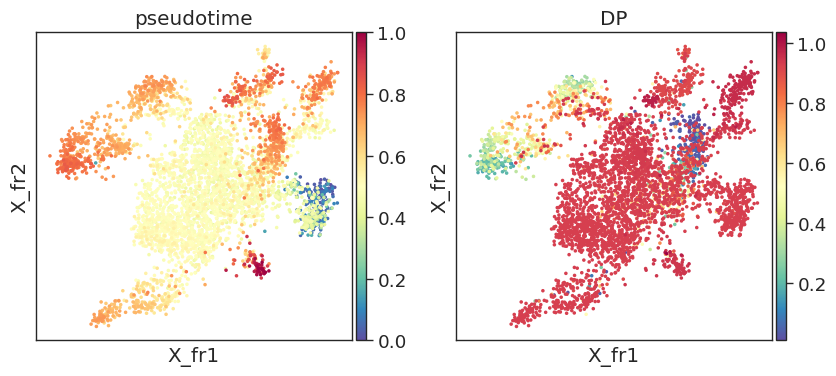

In [47]:
sc.pl.embedding(adata, basis="X_fr", color=['pseudotime', 'DP'])

In [48]:
pr_res.branch_probs.columns

Index(['OSCC15_TGACCCTGTTCCAGGC', 'OSCC4_CACATAGTCTTAGCCC',
       'OSCC8_ACTATCTCAGTGAGTG'],
      dtype='object')

In [49]:
terminal_cells = {
  "OSCC14_ATGAAAGTCTCGGGAC": "F06",
  "OSCC15_CTGATCCCACCGCTGA": "F03" ,
  "OSCC15_TGTCCCACATGGCCCA": "F04",
  "OSCC14_CATGGATAGACGCTCC": "F08",
  "OSCC8_CGAGCACCAATAAGCA": "F07"
}
#terminal_cells = pd.Series(terminal_cells)
terminal_cells

{'OSCC14_ATGAAAGTCTCGGGAC': 'F06',
 'OSCC15_CTGATCCCACCGCTGA': 'F03',
 'OSCC15_TGTCCCACATGGCCCA': 'F04',
 'OSCC14_CATGGATAGACGCTCC': 'F08',
 'OSCC8_CGAGCACCAATAAGCA': 'F07'}

In [50]:
pr_res = palantir.core.run_palantir(ms_data, early_cell=early_cell, use_early_cell_as_start=True, 
                                    num_waypoints=500, terminal_states=terminal_cells)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0019600550333658856 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


Time for shortest paths: 0.06464982430140177 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9980
Correlation at iteration 2: 0.9998
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/home/data/gz0323/.local/lib/python3.8/site-packages/palantir/core.py:447: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ent = ent.append(pd.Series(0, index=terminal_states))
/home/data/gz0323/.local/lib/python3.8/site-packages/palantir/core.py:450: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branch_probs = branch_probs.append(bp.loc[:, branch_probs.columns])


In [51]:
pr_res.branch_probs.head()

OSCC14_ATGAAAGTCTCGGGAC  OSCC14_CATGGATAGACGCTCC  \
OSCC1_AAAGATGGTGCTAGCC                 0.017428                 0.000000   
OSCC1_ACACCAAGTAGGGTAC                 0.062396                 0.000000   
OSCC1_ACCAGTAGTACATGTC                 0.163146                 0.000000   
OSCC1_ACCGTAAAGCACCGCT                 0.320314                 0.010409   
OSCC1_ACGAGGACAGCTGTGC                 0.309351                 0.000000   

                        OSCC15_CTGATCCCACCGCTGA  OSCC15_TGTCCCACATGGCCCA  \
OSCC1_AAAGATGGTGCTAGCC                 0.970991                 0.000000   
OSCC1_ACACCAAGTAGGGTAC                 0.896141                 0.023146   
OSCC1_ACCAGTAGTACATGTC                 0.728445                 0.060517   
OSCC1_ACCGTAAAGCACCGCT                 0.449145                 0.122660   
OSCC1_ACGAGGACAGCTGTGC                 0.455302                 0.142314   

                        OSCC8_CGAGCACCAATAAGCA  
OSCC1_AAAGATGGTGCTAGCC                0.000000  
OSCC1_ACACCAAGTAGGGTAC                0.016355  
OSCC1_ACCAGTAGTACATGTC                0.042761  
OSCC1_ACCGTAAAGCACCGCT                0.097472  
OSCC1_ACGAGGACAGCTGTGC                0.083227

In [52]:
##pr_res.branch_probs.columns = terminal_cells[pr_res.branch_probs.columns]

In [53]:
pr_res.branch_probs.columns = pr_res.branch_probs.columns.map(terminal_cells)

In [54]:
adata.obs['pseudotime'] = pr_res.pseudotime
adata.obs["DP"] = pr_res.entropy

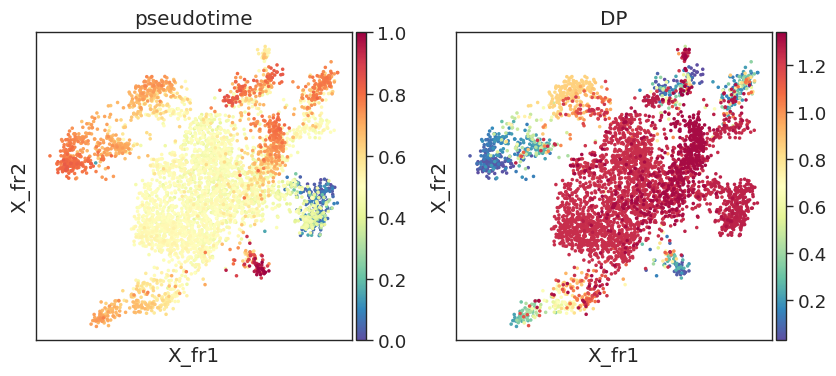

In [55]:
sc.pl.embedding(adata, basis="X_fr", color=['pseudotime', 'DP'])

In [56]:
for i in pr_res.branch_probs.columns.tolist():
    adata.obs[i] = pr_res.branch_probs[i]

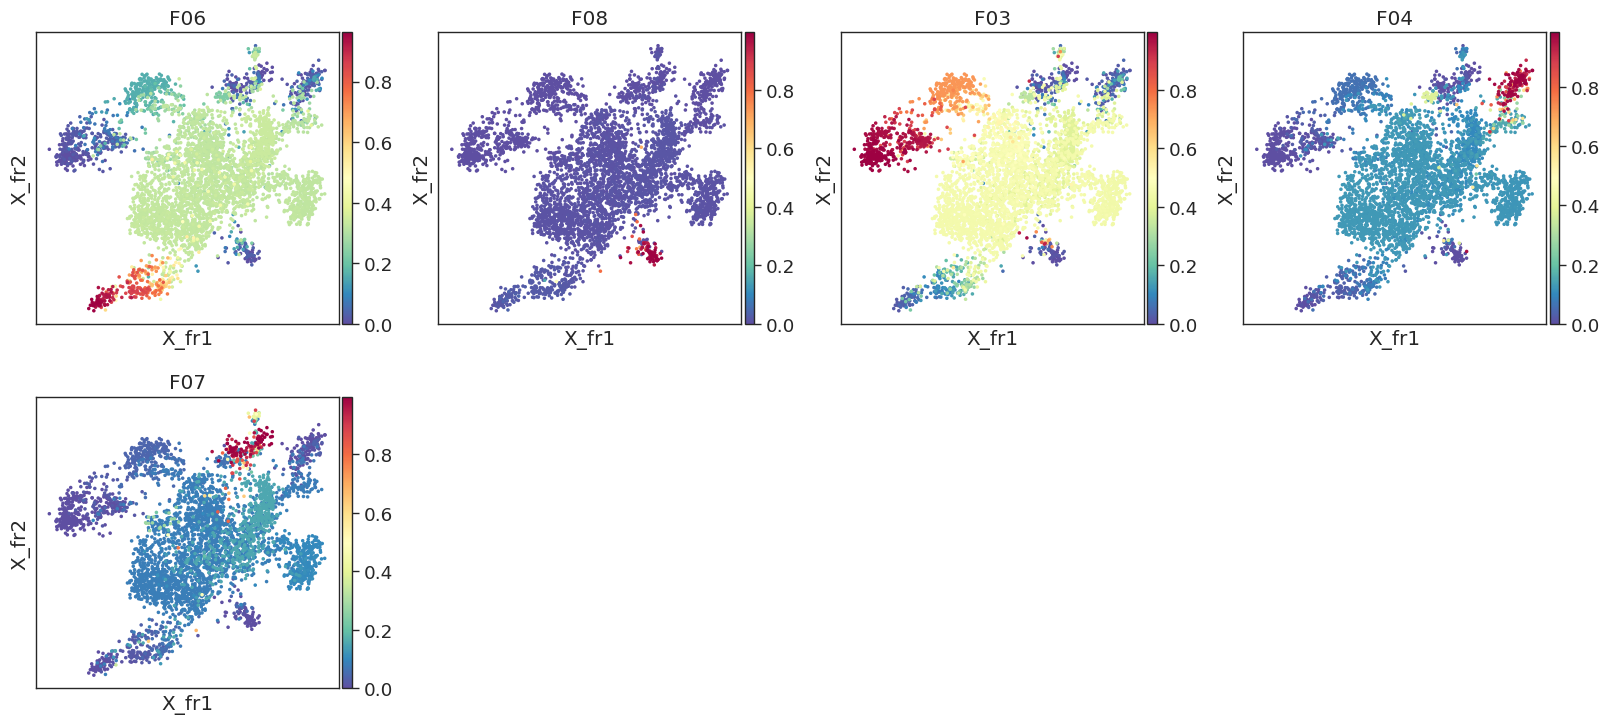

In [57]:
sc.pl.embedding(adata, basis="X_fr", color=pr_res.branch_probs.columns)

In [29]:
with open("../tmp/05.OSCCALLFIBpalantir_waypoint.txt", "w") as fo:
    [fo.write(cellID+"\n") for cellID in pr_res.waypoints.tolist()]

In [30]:
adata.obs.to_csv("../tmp/05.OSCCALLFIBpalantir1_results.csv")